# Multiclass Classification and Object Identification of Fashion MNIST using Convolutional Neural Networks
Author@Md Shahidullah Kawsar

**Abstruct:** As a yardstick of machine learning algorithms, 'Fashion MNIST' is one of the most popular datasets among the Artificial Intelligence (AI) and Data Science community. In this project, I performed multiclass classification on Fashion MNIST dataset and object identification of different clothes. The classification problem was very challenging due to the diversity of similar patterns on multiple classes which affected the performance of the classifier. For example, a shirt, a pullover and a dress may have long-sleeve of similar patterns or a sneaker and an ankle boot may have leis of similar patterns. 28x28 grayscale images of 70,000 fashion products from 10 categories, and 7,000 images per category.

### Convolutional Neural Networks (CNNs)
CNNs are deep learning algorithms that are particularly powerful for image analysis. It's a deep, feed-forward artificial neural network. The models are called "feed-forward" because information flows right through the model. There are no feedback connections in which outputs of the model are fed back into itself.

The convolution layer is used for filtering which computes the output of neurons which are linked to the receptive sections in the input, each calculates the dot product between their weights and a small receptive region to which they are attached to in the input. Each computation is performed for feature extraction map from the input image. For example, an image can be represented as a 4x4 matrix of different values. Now multiply these values with a matrix of 3x3 kernel size which gives a single value that represents all the values in that kernel of the images. As the kernel travels over the image, it’s looking for patterns in each section of the image using convolution.

Example: 
1. Identification of the objects in an image and distinguish between them. Suppose a self driving car should be able to tell whether a sign at the intersection is a stop sign or yield sign.
2. Image classification, object detection, segmentation, face recognition
3. Classification of crystal structure
4. In 2012, Alex Krizhevsky won that year's ImageNet Competition by reducing the classification error from 26% to 15% using convolutional neural networks

### What's the motivation behind CNNs?
CNNs are especially motivated by the biological visual cortex. The cortex has small regions of cells that are sensitive to the specific areas of the visual field. In 1962, the researchers revealed that some individual neurons in the brain triggered only in the existence of edges of a particular alignment like vertical or horizontal edges. For example, some neurons activated when exposed to vertical sides and some when exposed to a horizontal edge. Interestingly, all of these neurons are well ordered in a columnar fashion and that together they construct visual sensitivity. This idea of specialized components inside of a system having specific tasks is utilized in CNNs.

### Image
From an image, a computer can see only the numbers that represent the intensity of the image in each pixel. High values are brighter and low values are darker. Color images are stored in 3 dimensional arrays (height, width, color). The first two dimensions correspond to the height and width of the image (the number of pixels). The last dimension correspond to the red (0), green (1), blue (2) colors present in each pixel.


In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential

# Dense: Every unit in every layer is connected to all the units in the previous layer
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint
# from sklearn.model_selection import train_test_split

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

### Dataset 
The training set has 60,000 images, and the test set has 10,000 images. The dataset has 784 input features as pixel numbers from 0 (bright) to 255 (dark) and one output feature which is the class label.

Class labels: T-shirt/top (0), Trouser (1), Pullover (2), Dress (3), Coat (4), Sandal (5), Shirt (6), Sneaker (7), Bag (8), and Ankle boot (9).

In [42]:
# load the Fashion MNIST dataset from keras.datasets library
from keras.datasets import fashion_mnist
(x_train,y_train), (x_test,test_y) = fashion_mnist.load_data()

In [43]:
print('Training data shape : ')
display(x_train.shape, y_train.shape)

print('Test data shape : ')
display(x_test.shape, test_y.shape)

Training data shape : 


(60000, 28, 28)

(60000,)

Test data shape : 


(10000, 28, 28)

(10000,)

From the above output, the training data has a shape of 60000 x 28 x 28 since there are 60,000 training samples each of 28 x 28 dimension. Similarly, the test data has a shape of 10000 x 28 x 28 since there are 10,000 testing samples.

In [44]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
no_of_Classes = len(classes)
print('Total number of classes : ', no_of_Classes)
print('Class labels : ', classes)

Total number of classes :  10
Class labels :  [0 1 2 3 4 5 6 7 8 9]


#### Find the images of 10 different cloth types

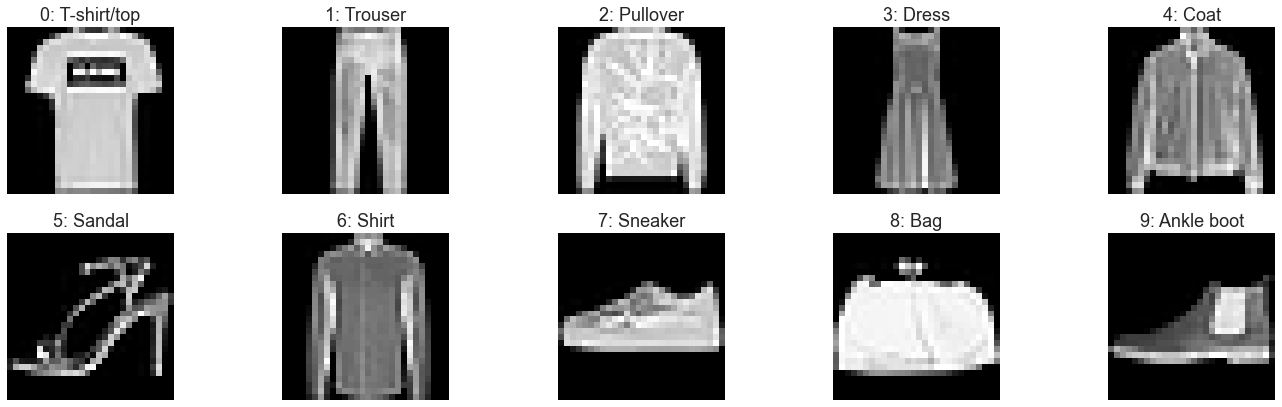

In [96]:
list_dif_class_images = []

for i in range(10):
    for j in range(y_train.shape[0]):
        if y_train[j] == i:
            list_dif_class_images.append(j)
            i=i+1

# print(list[:10])

class_title = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=[20,6])

for i in range(10):
    
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[list_dif_class_images[i],:,:], cmap='gray')
    plt.title(str(y_train[list_dif_class_images[i]]) + ": " + class_title[i])
    plt.axis('off')
    
plt.tight_layout()
plt.show()

The first output image is a t-shirt and assigned class label is 0. Similarly, other fashion products will have different labels, but similar products will have same labels. This means that all the 7,000 t-shirt images will have a class label of 0.

### Data Preprocessing
Pixels in most images are not independent from their neighbors. For example, images of objects contain edges, neighboring pixels along an edge tend to have similar patterns. Natural images contain spatial correlations. For example, pixels along a contour or edge. In this project, the training data in this case are images of clothes, we would like the pixels to retain their spatial relationship. The last dimension of the input image has length 1, because the images are black & white.

In [8]:
# reshape the dataset
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print('Training data shape : ')
display(x_train.shape, y_train.shape)

print('Test data shape : ')
display(x_test.shape, test_y.shape)

# check the data type
print(type(x_train))
# convert the date into float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# rescale the pixel values in range 0 - 1 inclusive
x_train = x_train / 255.
x_test = x_test / 255.


Training data shape : 


(60000, 28, 28, 1)

(60000,)

Test data shape : 


(10000, 28, 28, 1)

(10000,)

<class 'numpy.ndarray'>


### One-hot encoding
Neural networks expect the labels of classes in a dataset to be organized in a one-hot encoded manner because machine learning algorithms cannot work with categorical data directly. Each row in the array contains zeros in all columns, except the column corresponding to a unique label, which is set to 1.  Here, the one hot encoding will be a row vector, and for each image, it will have a dimension of 1 x 10. For example, 
<br> for label 0: [1 0 0 0 0 0 0 0 0 0]
<br> for label 1: [0 1 0 0 0 0 0 0 0 0]
<br> for label 2: [0 0 1 0 0 0 0 0 0 0]
<br> for label 3: [0 0 0 1 0 0 0 0 0 0]
<br> for label 4: [0 0 0 0 1 0 0 0 0 0]
<br> for label 5: [0 0 0 0 0 1 0 0 0 0]
<br> for label 6: [0 0 0 0 0 0 1 0 0 0]
<br> for label 7: [0 0 0 0 0 0 0 1 0 0]
<br> for label 8: [0 0 0 0 0 0 0 0 1 0]
<br> for label 9: [0 0 0 0 0 0 0 0 0 1]

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(test_y)

y_test.shape

(10000, 10)

### Cross-Validation
For the model to generalize well, split the training data into two parts, 80% for training and 20% for validation. This will help to reduce overfitting and boost the test performance.

In [47]:
# x_train, x_validation_set, y_train, y_validation_set = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# print('Shape of training data: ')
# display(x_train.shape, y_train.shape)

# print('Shape of validation data: ')
# display(x_validation_set.shape, y_validation_set.shape)

Shape of training data: 


(48000, 28, 28, 1)

(48000, 10)

Shape of validation data: 


(12000, 28, 28, 1)

(12000, 10)

### One dimensional convolutions
A convolution of an one-dimensional array with a kernel comprises of taking the kernel, sliding it along the array, multiplying it with the items in the array that overlap with the kernel in that location and summing this product. In the first example, the array goes between o and 1 twice. In this case, the edges that go from zero to one match the kernel, but edges from 1 to 0 are the opposite of the kernel. In these locations, the colvolution becomes negative.

In [10]:
# Example 1

array = np.array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0])
kernel = np.array([-1, 1])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0])
for i in range(8):
    conv[i] = (kernel * array[i:i+2]).sum()

print(conv)

[ 0  1  0 -1  0  1  0 -1  0]


In [11]:
# Example 2

array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Output array
for i in range(8):
    conv[i] = (kernel * array[i:i+3]).sum()

# Print conv
print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


#### Edge detection

In [9]:
#image_2d = np.array([[1, 1, 1], [0, 1, 0], [1, 1, 1]])
#vertical_kernel = np.array([[-1, 1, -1], [-1, 1, -1], [-1, 1, -1]])
#horizontal_kernel = np.array([[-1, -1, -1], [1, 1, 1], [-1, -1, -1]])
#light_spot_kernel = np.array([[-1, -1, -1], [-1, 1, -1], [-1, -1, -1]])
#dark_spot_kernel = np.array([[1, 1, 1], [1, -1, 1], [1, 1, 1]])

#vertical_edge_detection = image_2d*vertical_kernel
#horizontal_edge_detection = image_2d*horizontal_kernel
#light_spot_detection = image_2d*light_spot_kernel
#dark_spot_detection = image_2d*dark_spot_kernel

#print("Sample 2D image:")
#print(image_2d)
#print("vertical_edge_detection:")
#print(vertical_edge_detection)
#print("horizontal_edge_detection:")
#print(horizontal_edge_detection)
#print("light_spot_detection:")
#print(light_spot_detection)
#print("dark_spot_detection:")
#print(dark_spot_detection)


### 2D Image Convolutions
The convolution of an image with a kernel summarizes a part of the image as the sum of the multiplication of that part of the image with the kernel. For example, we convolve the image of a dress with a kernel that matches vertical edges on the left. This means that when we convolve the image with this kernel, the left edge is emphasized. The right side of the image is the opposite of this kernel, and the convolution is negative there.

In [12]:
print("kernel to find a vertical line in images:")
print(np.array([[-1, 1, -1], [-1, 1, -1], [-1, 1, -1]]))

print("kernel to find a horizontal line in images:")
print(np.array([[-1, -1, -1], [1, 1, 1], [-1, -1, -1]]))

print("kernel to find a light spot surrounded by dark pixels:")
print(np.array([[-1, -1, -1], [-1, 1, -1], [-1, -1, -1]]))

print("kernel to find a dark spot surrounded by bright pixels:")
print(np.array([[1, 1, 1], [1, -1, 1], [1, 1, 1]]))

kernel to find a vertical line in images:
[[-1  1 -1]
 [-1  1 -1]
 [-1  1 -1]]
kernel to find a horizontal line in images:
[[-1 -1 -1]
 [ 1  1  1]
 [-1 -1 -1]]
kernel to find a light spot surrounded by dark pixels:
[[-1 -1 -1]
 [-1  1 -1]
 [-1 -1 -1]]
kernel to find a dark spot surrounded by bright pixels:
[[ 1  1  1]
 [ 1 -1  1]
 [ 1  1  1]]


### Convolutional network for image classification
Convolutional networks for classification are constructed from a sequence of convolutional layers (for image processing) and fully connected (Dense) layers (for readout). 

**Dense layer:** every unit in the layer connected to the every unit in the previous layer.

**Conv2D layer:** every unit in the layer connected to the previous layer through a convolution kernel. It means the output of each unit in this layer is a convolution of a kernel over the image input. 

A dense layer has one weight for each pixel in the image, but a convolution layer has only one weight for each pixel in the kernel. If kernel_size = 3, it means the kernel of each unit has 9 pixels. If the conv2D layer has 10 units, it would have 9 x 10 = 90 parameters for these kernels.

**Flatten layer:** Connector between convolution and densely connected layers. It takes the output of the convolution (feature map) and flattens it into a 1D array.

**MaxPooling2D Layer:** In order to reduce the dimension of the input, one of the methods of subsampling is max pooling which aids to reduce overfitting. Depending on its size, max pooling selects the largest pixel value from a region. Suppose, a 2x2 max pooling layer will choose the highest pixel intensity value from a 2x2 region. By using a kernel and travel it over the image, the max pooling layer mechanism is similar to the convolution layer. The sole distinction is the function which is applied to the kernel and the image kernel is non-linear.


In [13]:
# CNN model 1
# The model will all be of the Sequential type, 
# meaning that the outputs of one layer are provided as inputs only to the next layer.
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), activation='linear', input_shape=(28,28,1), padding='same'))
# input_shape is the size of the input images to the network

model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), strides=2))
model.add(Conv2D(64, (5, 5), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10, activation='softmax')) # number of classes = 10

# for classification tasks, categorical crossentropy is an appropriate loss function
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# During training, the network adjusts its weights through backpropagation and gradient descent
# 10 epoch means the model will go over all of the training data 10 times
# the algorithm might overfit to the training data, 
# that the weights result in very small error on the training set, 
# but would not generalize well to unseen dataset
# Thus, at the end of every epoch of training, we'll test the model on the validation set

# This checkpoint object will store the model parameters in the file "weights.hdf5"
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)
# Store in a list to be used during training
callbacks_list = [checkpoint]

# Fit the model on a training set, using the checkpoint as a callback

# model_1 = model.fit(x_train, y_train, batch_size=64, epochs=1, verbose=1, validation_data=(x_validation_set, y_validation_set))
model_1 = model.fit(x_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, callbacks=callbacks_list)





Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 172us/step - loss: 0.4384 - accuracy: 0.8431 - val_loss: 0.3077 - val_accuracy: 0.8924
Epoch 2/10
48000/48000 [==============================] - 6s 123us/step - loss: 0.2839 - accuracy: 0.8965 - val_loss: 0.2655 - val_accuracy: 0.9022
Epoch 3/10
48000/48000 [==============================] - 6s 124us/step - loss: 0.2379 - accuracy: 0.9131 - val_loss: 0.2502 - val_accuracy: 0.9094
Epoch 4/10
48000/48000 [==============================] - 6s 123us/step - loss: 0.2059 - accuracy: 0.9241 - val_loss: 0.2474 - val_accuracy: 0.9128
Epoch 5/10
48000/48000 [==============================] - 6s 123us/step - loss: 0.1795 - accuracy: 0.9337 - val_loss: 0.2486 - val_accuracy: 0.9097
Epoch 6/10
48000/48000 [==============================] - 6s 125us/step - loss: 0.1560 - accuracy: 0.9430 - val_loss: 0.2571 - val_accuracy: 0.9145
Epoch 7/10
48000/48000 [==============================] - 6s

In [14]:
# Loading stored parameters
model.load_weights('weights.hdf5')
model_1_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_1_score[0])
print('Test accuracy:', model_1_score[1])

Test loss: 0.2536847322314978
Test accuracy: 0.9154000282287598


### Calculating the size of the output

Zero padding and strides affect the size of the output of a convolution.

What is the size of the output for an input of size 28 by 28, with a kernel of size 3 by 3, padding of 1 and strides of 1?
<br> Output = ((size of the input - size of the kernel + 2xSize of the zero padding) / Strides) + 1
= ((28 - 3 + 2x1)/1) + 1 = 28

What is the size of the output for an input of size 256 by 256, with a kernel of size 4 by 4, padding of 1 and strides of 2?
<br> Output = ((size of the input - size of the kernel + 2xSize of the zero padding) / Strides) + 1
= ((256 - 4 + 2x1)/2) + 1 = 128

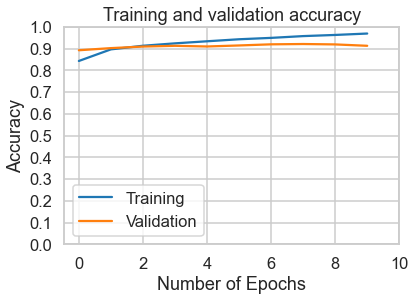

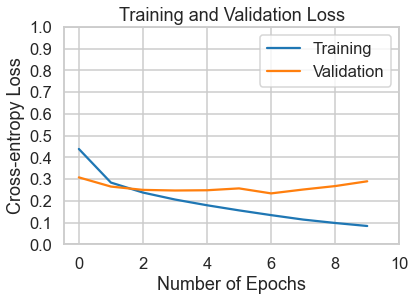

In [33]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context('talk')

accuracy = model_1.history['accuracy']
validation_accuracy = model_1.history['val_accuracy']
cross_entropy_loss = model_1.history['loss']
validation_loss = model_1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label='Training')
plt.plot(epochs, validation_accuracy, label='Validation')
plt.title('Training and validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 11, step=2))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend()

plt.figure()
plt.plot(epochs, cross_entropy_loss, label='Training')
plt.plot(epochs, validation_loss, label='Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-entropy Loss')
plt.xticks(np.arange(0, 11, step=2))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend()
plt.show()

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

(10000,) (10000,)
              precision    recall  f1-score   support

     Class 0       0.82      0.86      0.84      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.89      0.84      0.87      1000
     Class 3       0.90      0.94      0.92      1000
     Class 4       0.88      0.86      0.87      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.76      0.76      0.76      1000
     Class 7       0.94      0.99      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

[[858   1  18  21   1   1  91   0   9   0]
 [  3 977   0  14   4   0   1   0   1   0]
 [ 31   1 843  10  50   0  64   0   1   0]
 [ 14   2   7 943  17   0  15   0   2   0]
 [ 16   0  36  25 859   0  64   0   0   0]
 [  0   

Text(148.5, 0.5, 'true value')

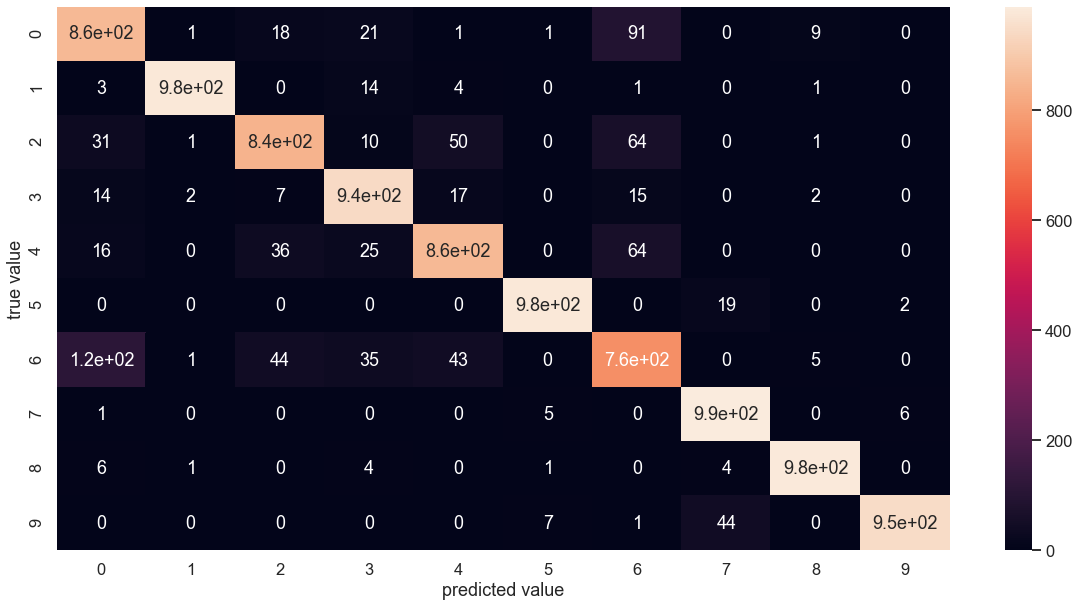

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(np.round(y_pred), axis=1)
print(y_pred.shape, test_y.shape)

target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(test_y, y_pred, target_names=target_names))

plt.figure(figsize=(20, 10))
confusion_matrix = confusion_matrix(test_y, y_pred)
print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [21]:
# CNN model 2
model_2 = Sequential()
model_2.add(Conv2D(32, kernel_size=(5, 5), activation='linear', input_shape=(28,28,1), padding='same'))
model_2.add(LeakyReLU(alpha=0.1))
model_2.add(MaxPooling2D((2, 2), strides=2))
model_2.add(Dropout(0.2))
model_2.add(Conv2D(64, (5, 5), activation='linear', padding='same'))
model_2.add(LeakyReLU(alpha=0.1))
model_2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model_2.add(Dropout(0.2))

model_2.add(Flatten())
model_2.add(Dense(128, activation='linear'))
model_2.add(LeakyReLU(alpha=0.1))
model_2.add(Dropout(0.2))
model_2.add(Dense(10, activation='softmax')) # number of classes = 10

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint_2 = ModelCheckpoint('weights2.hdf5', monitor='val_loss', save_best_only=True)
# Store in a list to be used during training
callbacks_list_2 = [checkpoint_2]
Model_2 = model_2.fit(x_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2, callbacks=callbacks_list_2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 139us/step - loss: 0.4913 - accuracy: 0.8205 - val_loss: 0.3426 - val_accuracy: 0.8785
Epoch 2/10
48000/48000 [==============================] - 6s 134us/step - loss: 0.3211 - accuracy: 0.8831 - val_loss: 0.2874 - val_accuracy: 0.8907
Epoch 3/10
48000/48000 [==============================] - 7s 142us/step - loss: 0.2753 - accuracy: 0.8980 - val_loss: 0.2561 - val_accuracy: 0.9038
Epoch 4/10
48000/48000 [==============================] - 7s 137us/step - loss: 0.2529 - accuracy: 0.9059 - val_loss: 0.2513 - val_accuracy: 0.9076
Epoch 5/10
48000/48000 [==============================] - 6s 134us/step - loss: 0.2315 - accuracy: 0.9133 - val_loss: 0.2384 - val_accuracy: 0.9133
Epoch 6/10
48000/48000 [==============================] - 6s 134us/step - loss: 0.2181 - accuracy: 0.9184 - val_loss: 0.2391 - val_accuracy: 0.9146
Epoch 7/10
48000/48000 [==============================] - 6s 1

In [20]:
# from keras import backend
# print(backend.tensorflow_backend._get_available_gpus())

In [22]:
# Loading stored parameters
model_2.load_weights('weights2.hdf5')

model_2_score = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', model_2_score[0])
print('Test accuracy:', model_2_score[1])

Test loss: 0.2389380339384079
Test accuracy: 0.9136000275611877


In [23]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)         

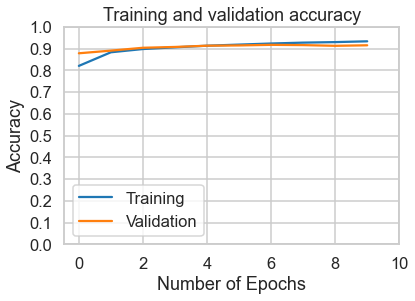

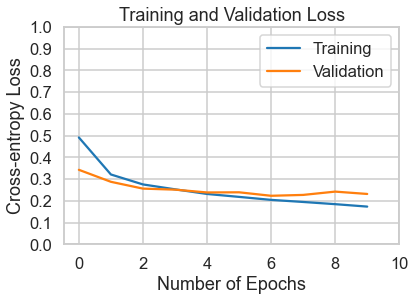

In [34]:
accuracy = Model_2.history['accuracy']
validation_accuracy = Model_2.history['val_accuracy']
cross_entropy_loss = Model_2.history['loss']
validation_loss = Model_2.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label='Training')
plt.plot(epochs, validation_accuracy, label='Validation')
plt.title('Training and validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 11, step=2))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend()

plt.figure()
plt.plot(epochs, cross_entropy_loss, label='Training')
plt.plot(epochs, validation_loss, label='Validation')
plt.title('Training and Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-entropy Loss')
plt.xticks(np.arange(0, 11, step=2))
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.legend()
plt.show()

In [25]:
y_pred_2 = model_2.predict(x_test)
y_pred_2 = np.argmax(np.round(y_pred_2), axis=1)
print(y_pred_2.shape, test_y.shape)

target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(test_y, y_pred_2, target_names=target_names))

(10000,) (10000,)
              precision    recall  f1-score   support

     Class 0       0.75      0.90      0.82      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.88      0.85      0.86      1000
     Class 3       0.93      0.89      0.91      1000
     Class 4       0.86      0.85      0.86      1000
     Class 5       0.98      0.99      0.98      1000
     Class 6       0.80      0.71      0.75      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



[[891   0  12   9   4   1  78   0   4   1]
 [  4 981   0  11   1   0   2   0   1   0]
 [ 45   1 801   5  93   0  54   0   1   0]
 [ 41   3   7 879  42   0  28   0   0   0]
 [ 18   0  16   8 915   0  43   0   0   0]
 [  0   0   0   0   0 991   0   4   0   5]
 [134   0  43  12  61   0 744   0   6   0]
 [  1   0   0   0   0  17   0 964   0  18]
 [  9   1   0   2   4   1   1   1 981   0]
 [  4   0   0   0   0   6   1  29   0 960]]


Text(148.5, 0.5, 'true value')

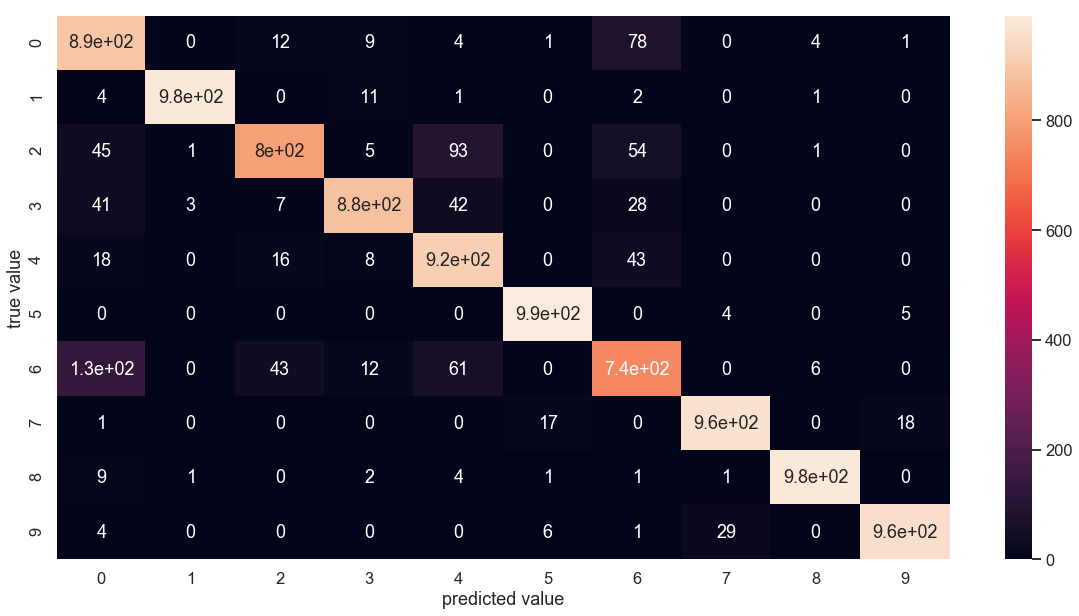

In [157]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(20, 10))
confusion_matrix = confusion_matrix(test_y, y_pred_2)
print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value')

### Example of the correct classification

Found %d correct labels 9082


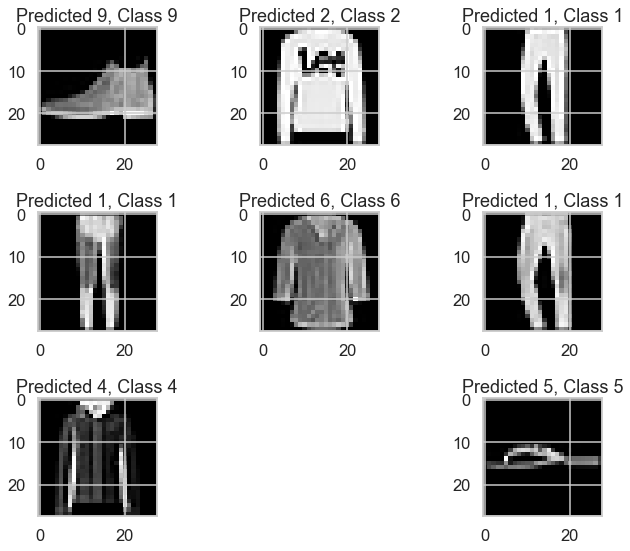

In [26]:
plt.figure(figsize=(10, 8))
correct = np.where(y_pred_2==test_y)[0]
print("Found correct labels = ", len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_2[correct], test_y[correct]))
    plt.tight_layout()

### Example of the incorrect classification

Found %d incorrect labels 918


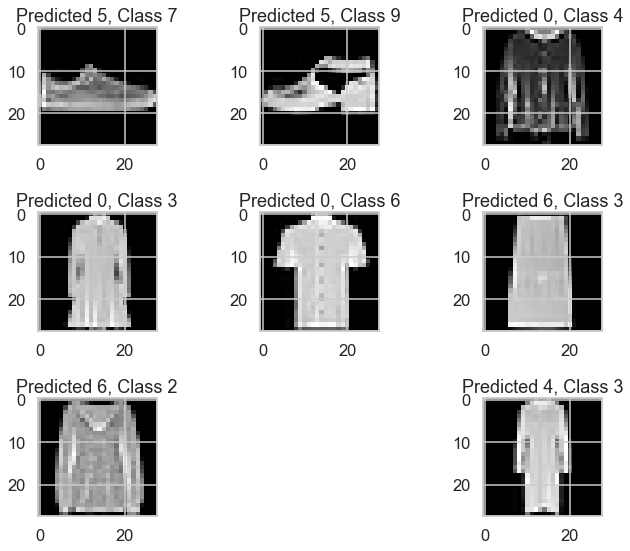

In [27]:
plt.figure(figsize=(10, 8))
incorrect = np.where(y_pred_2!=test_y)[0]
print("Found %d incorrect labels", len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred_2[incorrect], test_y[incorrect]))
    plt.tight_layout()